# Dataset: *charliehebdo*

- df.to_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-df.csv',index=False)
- src_tw_df.to_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-src.csv',index=False)

In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator
import nltk
from nltk import FreqDist, word_tokenize

In [2]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-df.csv', encoding = 'utf-8', header = 0)
print(df.columns)
print(df.shape)
df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date',
       'reply_tweet_id', 'reply_user_id', 'reply_tweet', 'reply_date', 'label',
       'cleaned_src_tw', 'cleaned_reply_tw', 'src_sentiment',
       'reply_sentiment', 'reply_emotion'],
      dtype='object')
(36189, 14)


,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_src_tw,cleaned_reply_tw,src_sentiment,reply_sentiment,reply_emotion
0,552784600502915072,331658004,Charlie Hebdo became well known for publishing...,Wed Jan 07 11:11:33 +0000 2015,552785249420447745,18370911,"Now 10 dead in a shooting there today RT ""@BBC...",Wed Jan 07 11:14:08 +0000 2015,0,charli hebdo becam well known publish muham ca...,10 dead shoot today rt bbcdaniel charli hebdo ...,Positive,Negative,Happy


In [3]:
src_tw_df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-src.csv', encoding = 'utf-8', header =0)
print(src_tw_df.columns)
print(src_tw_df.shape)
src_tw_df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date', 'label',
       'cleaned_src_tw', 'src_sentiment', 'src_emotion'],
      dtype='object')
(2002, 8)


,src_tweet_id,src_user_id,src_tweet,src_date,label,cleaned_src_tw,src_sentiment,src_emotion
0,552784600502915072,331658004,Charlie Hebdo became well known for publishing...,Wed Jan 07 11:11:33 +0000 2015,0,charli hebdo becam well known publish muham ca...,Positive,Happy


In [4]:
df.isnull().sum()

src_tweet_id           0
src_user_id            0
src_tweet              0
src_date               0
reply_tweet_id         0
reply_user_id          0
reply_tweet            0
reply_date             0
label                  0
cleaned_src_tw         0
cleaned_reply_tw    1271
src_sentiment          0
reply_sentiment        0
reply_emotion          0
dtype: int64

In [5]:
df.loc[df.cleaned_reply_tw.isnull(),['reply_tweet','cleaned_reply_tw','reply_sentiment']]

,reply_tweet,cleaned_reply_tw,reply_sentiment
47,@GuidoFawkes @R_Christianity_,NaN,Neutral
83,@GuidoFawkes,NaN,Neutral
112,@Observers @SamdeBrito @WilliamMolinie,NaN,Neutral
141,@john_mcguirk @laracchi @Petri2020 @Holopainen...,NaN,Neutral
193,@Klartext89 @AllenStarr1 @MrHarryCole @GazTheJ...,NaN,Neutral
...,...,...,...
36148,@SkyNews @Cosmo_13_,NaN,Neutral
36152,@SkyNews 🙏,NaN,Neutral
36158,@SkyNews 👍🍸,NaN,Neutral
36161,@SkyNews @tomfranks9,NaN,Neutral


- Delete those meaningless responses.

In [6]:
df.dropna(inplace = True)

In [7]:
src_tw_df.isnull().sum()

src_tweet_id      0
src_user_id       0
src_tweet         0
src_date          0
label             0
cleaned_src_tw    0
src_sentiment     0
src_emotion       0
dtype: int64

In [8]:
df1 = pd.merge(df, src_tw_df[['src_tweet_id','src_emotion']], on='src_tweet_id')
df1.head(1)

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_src_tw,cleaned_reply_tw,src_sentiment,reply_sentiment,reply_emotion,src_emotion
0,552784600502915072,331658004,Charlie Hebdo became well known for publishing...,Wed Jan 07 11:11:33 +0000 2015,552785249420447745,18370911,"Now 10 dead in a shooting there today RT ""@BBC...",Wed Jan 07 11:14:08 +0000 2015,0,charli hebdo becam well known publish muham ca...,10 dead shoot today rt bbcdaniel charli hebdo ...,Positive,Negative,Happy,Happy


In [9]:
print("df's shape: ",df.shape)
print("df1's shape: ",df1.shape)
print("src_tw_df's shapes: ", src_tw_df.shape)

df's shape:  (34918, 14)
df1's shape:  (34918, 15)
src_tw_df's shapes:  (2002, 8)


## Sentiment Analysis

<AxesSubplot:xlabel='src_sentiment', ylabel='count'>

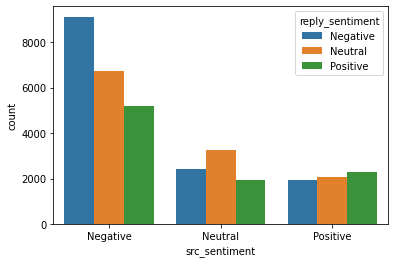

In [84]:
 a = pd.DataFrame(df.groupby(['src_sentiment','reply_sentiment']).size(),columns=['count']).reset_index()
sns.barplot(x = 'src_sentiment', y='count', data = a, hue = 'reply_sentiment')

1. source tweet analysis

In [44]:
a = pd.DataFrame(src_tw_df.groupby('src_sentiment').size(),columns=['count_src'])
relative_count = a.count_src / a.count_src.sum()
a['relative_count'] = relative_count
a
# print(pd.DataFrame(df.groupby('reply_sentiment').size(),columns=['count']))

,count_src,relative_count
src_sentiment,,
Negative,1168,0.583417
Neutral,468,0.233766
Positive,366,0.182817


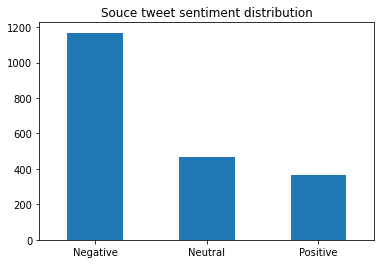

In [55]:
src_tw_df.src_sentiment.value_counts().plot(kind='bar')
plt.title('Souce tweet sentiment distribution')
plt.xticks(rotation = 0)
plt.show()

In [48]:
#which sentiment of original posts received most replys
b = pd.DataFrame(df.groupby('src_sentiment').size(),columns=['# of replys'])
c = a.join(b)
c['relative_count_reply'] = c['# of replys'] / c['relative_count'] #consider negative src_tw comstitutes most of the dataset.
c


,count_src,relative_count,# of replys,relative_count_reply
src_sentiment,,,,
Negative,1168,0.583417,21049,36078.851027
Neutral,468,0.233766,7569,32378.500000
Positive,366,0.182817,6300,34460.655738


<AxesSubplot:>

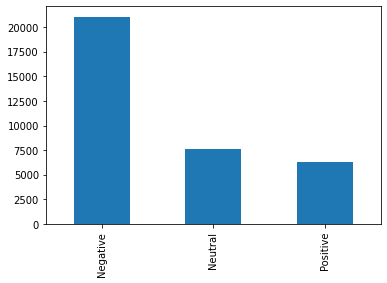

In [72]:
df.src_sentiment.value_counts().plot(kind='bar',stacked=True)

In [71]:
sns.countbar(data = df, x='src_sentiment',hue = 'reply_sentiment')

AttributeError: module 'seaborn' has no attribute 'countbar'

(0.0, 10000.0)

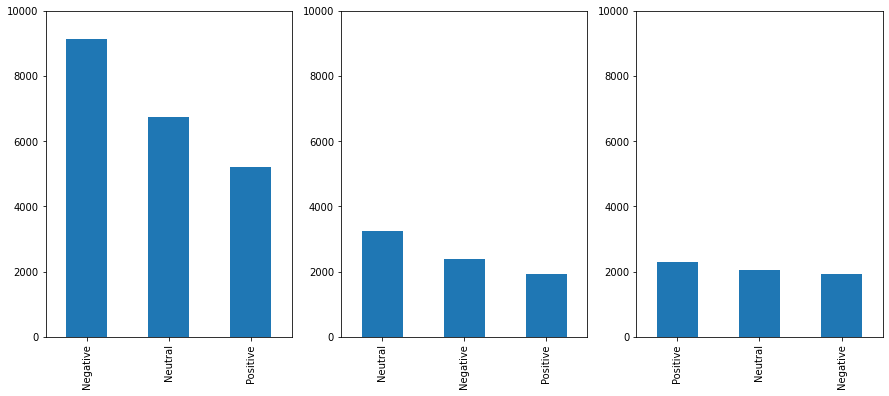

In [68]:
# Among those src tweet are negative, which sentiment of replys they received the most.
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(131)
df.loc[df.src_sentiment =='Negative']['reply_sentiment'].value_counts().plot(kind='bar')
ax1.set_ylim([0, 10000])

ax2 = fig.add_subplot(132)
df.loc[df.src_sentiment =='Neutral']['reply_sentiment'].value_counts().plot(kind='bar')
ax2.set_ylim([0, 10000])

ax3 = fig.add_subplot(133)
df.loc[df.src_sentiment =='Positive']['reply_sentiment'].value_counts().plot(kind='bar')
ax3.set_ylim([0, 10000])

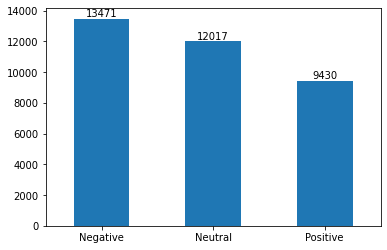

In [10]:
# Reply sentiment analysis
ax = df.reply_sentiment.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.xticks(rotation=0)
plt.show()

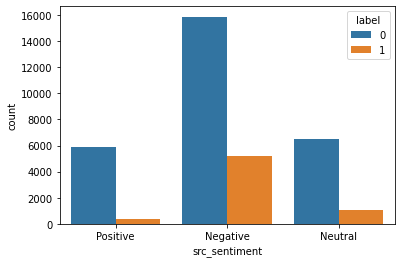

In [24]:
# Reply sentiment analysis
ax = sns.countplot(data=df1, hue = 'label',x='src_sentiment')



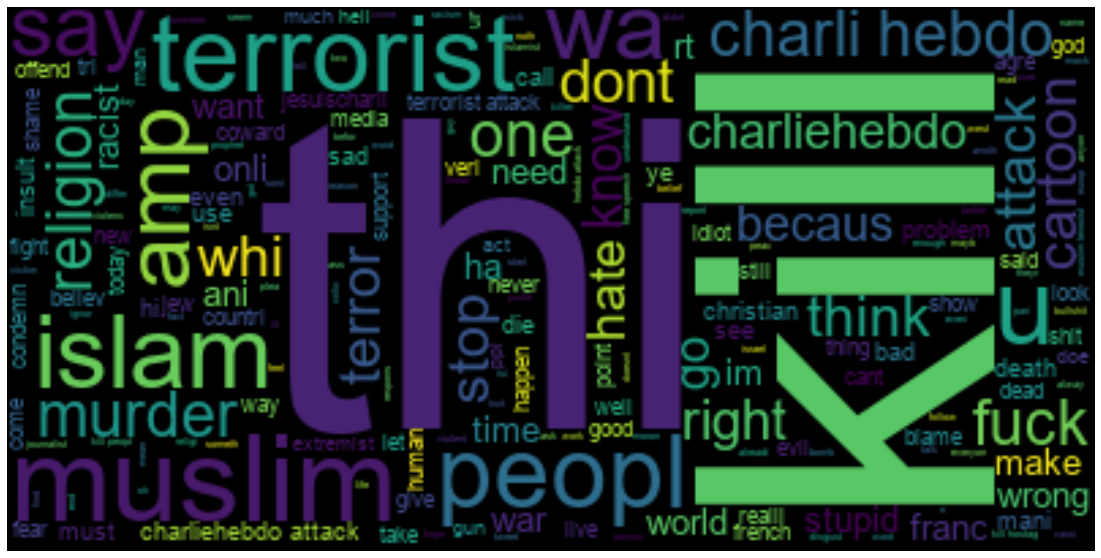

In [17]:
text = " ".join(i for i in df.loc[df.reply_sentiment =='Negative']['cleaned_reply_tw'])
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="black", font_path='arial').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
text_lst = text.split()
freq = FreqDist(text_lst)
freq.plot(20)
pd.DataFrame(freq.items(),columns = ['Word','Frequency']).sort_values('Frequency',ascending=False)[0:10]

In [ ]:
# Souce tweet sentiment analysis
ax = src_tw_df.src_sentiment.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.xticks(rotation=0)
plt.show()

## Keywords

- Reply tweets

In [ ]:
text = " ".join(i for i in df['cleaned_reply_tw'])
print ("There are {} words in the combination of all review.".format(len(text)))

In [ ]:
text_lst = text.split()
freq = FreqDist(text_lst)
freq.plot(20)
pd.DataFrame(freq.items(),columns = ['Word','Frequency']).sort_values('Frequency',ascending=False)[0:10]